In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
df=pd.read_csv("heart.csv")

ANALYZING AND VISUALIZING THE DATASET....

In [50]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [52]:
df.shape

(1025, 14)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [56]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [58]:
df.isnull().sum() #There is no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

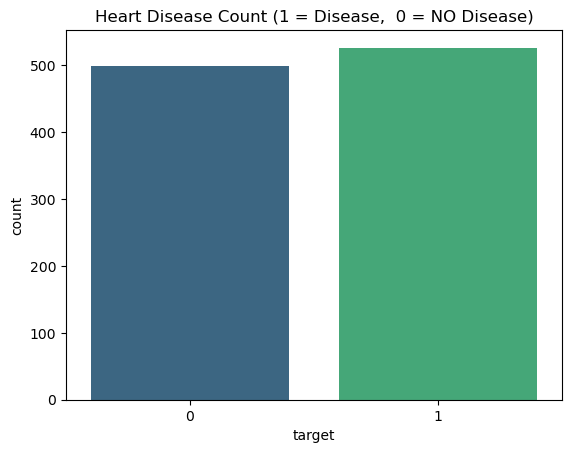

In [63]:
sns.countplot(x='target', data=df, hue='target', legend=False, palette=('viridis'))
plt.title("Heart Disease Count (1 = Disease,  0 = NO Disease)")
plt.show

THE DATASET CONTAINS PATIENT HEALTNH RECORDS with a TARGET variable indicating the presense or absence of heart disease.
the countplot shows that patients with less heaert disease(target=0) and the patients with more heart disease(target=1)
IT appears that sex 1 is higher meaning that there's more heart disease.
                                                        

[]

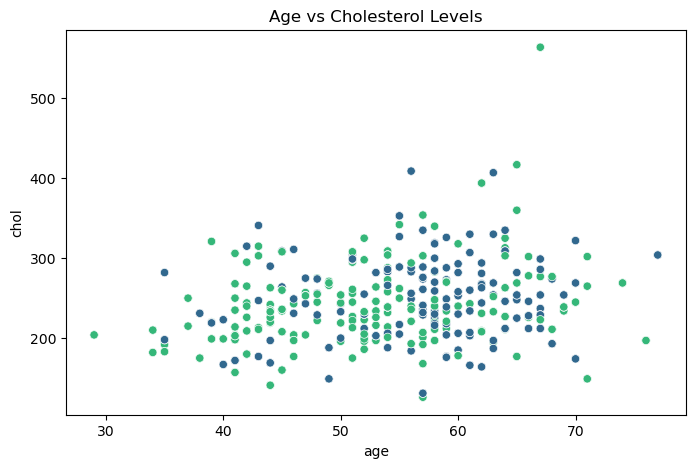

In [66]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age',y='chol',hue='target', data=df, legend=False, palette=('viridis'))
plt.title("Age vs Cholesterol Levels")
plt.plot()

It shows that in the graph the age of 60-70 have more Cholesterol Levels.


3.MAKING PREDICTIONS AND FORECASTING WHERE NECESSARY

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

defining features (x) and target variable (y)

USING LOGISTIC REGRESSION FOR CLASSIFICATION

In [73]:
x=df.drop(columns=['target']) 
y=df['target']

SPLITTING INTO TRAINING (80%) AND TESTING (20) SETS

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

STANDARDLIZING FEATURES FOR BETTER PERFORMANCE

In [79]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

TRAINING LOGISTIC REGRESSION....

In [82]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

PREDICTING 

In [85]:
y_pred_log = log_model.predict(x_test)

print("Logistic Regression Accurate:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accurate: 0.7951219512195122
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [87]:
y_pred_log

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

USING RANDOM FOREST FOR BETTER PERFORMANCE

In [91]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

PREDICTING 

In [94]:
y_pred_rf = rf_model.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [96]:
y_pred_rf

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

 CONFUSION METRICS


In [123]:
confusion_matrix(y_test, y_pred_rf)

array([[102,   0],
       [  3, 100]], dtype=int64)

In [133]:
cm= confusion_matrix(y_test, y_pred_rf)

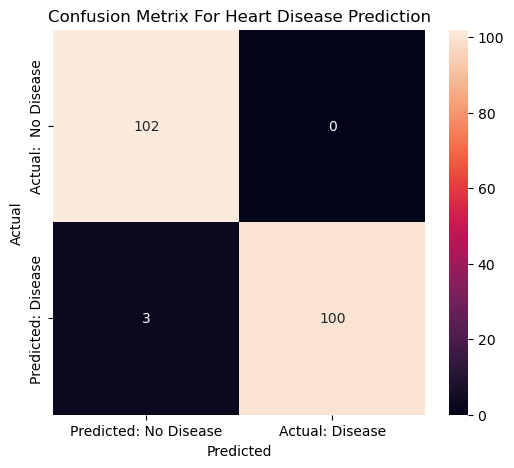

Error Rate:0.014634


In [135]:
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True, fmt='d',
            xticklabels=['Predicted: No Disease', 'Actual: Disease'],
            yticklabels=['Actual:  No Disease', 'Predicted: Disease'])

plt.title('Confusion Metrix For Heart Disease Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

error_rate = (cm[0,1] +cm[1,0])/cm.sum() #cm[0,1]-False Positive(misclassfied as positive.) 
                                         #cm[0,1]-False Negative(misclassfied as Negative.) 
                                         
print(f'Error Rate:{error_rate:>2f}')

TRUE POSITIVE = 100(CORRECTLY PREDICTED AS TARGET 1(Disease)

TRUE NEGATIVE = 102(CORRECTLY PREDICTED AS TARGET 0(No disease)

FALSE POSITIVE = 0(PREDICTED AS TARGET 0(No disease)

FALSE NEGATIVE = 3(PREDICTED AS NO DISEASE WHEN IT WAS TARGET 1(Disease)

1= DISEASE

0= NO DISEASE


THIS MEANS THAT THE MODEL ONLY MADE 3 WRONG PREDICTIONS OUT OF 205, WHICH IS AN EXCELLENT PREDICTION

KEY INSIGHTS:

1.HIGH ACCURACY:98.5%


2.NO FALSE POSITIVE: THE MODEL NEVER FALSELY PREDICTED SOMEONE HAD HEART DISEASE. 

THE ERROR RATE IMPLIES THAT APPROXIAMATELY 1.46% OF PREDICTION ARE INCORRECT, WHILE 98.5% OF PREDDICTIONS ARE CORRECT